In [1]:
from __future__ import print_function, division

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np

import keras
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dropout, Dense
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.normalization import BatchNormalization
from keras.layers.pooling import AveragePooling2D
from keras import optimizers
from keras import initializers
from keras import regularizers

Using TensorFlow backend.


In [3]:
from keras.datasets import cifar10

# 10 classes for cifar10.
nb_classes = 10

# Download and load the data.
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Convert to float datatype.
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

# Normalize so the max value is 1.
X_train /= 255
X_test /= 255

# Change to 1-hot encoding.
Y_train = keras.utils.np_utils.to_categorical(y_train, nb_classes)
Y_test = keras.utils.np_utils.to_categorical(y_test, nb_classes)

In [4]:
# Check our shapes.
print(X_train.shape)
print(X_test.shape)

print(Y_train.shape)
print(Y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 10)
(10000, 10)


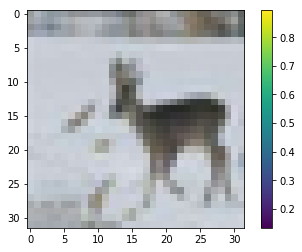

In [5]:
idx = 20
plt.imshow(np.squeeze(X_train[idx,:,:]), interpolation="None"); plt.colorbar()

In [6]:
# Subtract by the mean pixel, so image data is centered around 0.
mean_px = X_train.mean(axis=0).mean(axis=0).mean(axis=0)
X_train -= mean_px

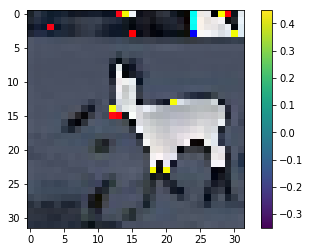

In [7]:
# Looks odd now since it's centered around 0.
idx = 20
plt.imshow(np.squeeze(X_train[idx,:,:]), interpolation="None"); plt.colorbar()

In [8]:
inputs = Input(shape=(32, 32, 3))

padding = 'same' # 'valid' 'same'
kernel_init = initializers.he_uniform()
reg = regularizers.l2(0.0005)


def conv_bn_relu(x, nb_filters, kernel_size=(3,3), padding='same'):
    x = Conv2D(nb_filters, kernel_size=kernel_size, padding=padding, kernel_initializer=kernel_init, kernel_regularizer=reg)(x)
    x = BatchNormalization()(x)
    x = LeakyReLU(0.33)(x)
    return x

x = inputs
x = conv_bn_relu(x, 64, kernel_size=(3,3))
x = MaxPooling2D((2, 2), strides=(2, 2), padding=padding)(x)

x = conv_bn_relu(x, 64, kernel_size=(3,3))
x = MaxPooling2D((2, 2), strides=(2, 2), padding=padding)(x)

x = conv_bn_relu(x, 64, kernel_size=(3,3))
x = MaxPooling2D((2, 2), strides=(2, 2), padding=padding)(x)

x = conv_bn_relu(x, 64, kernel_size=(3,3))
x = MaxPooling2D((2, 2), strides=(2, 2), padding=padding)(x)

# Output layer.
x = Flatten()(x)
x = Dropout(0.5)(x)
preds1 = Dense(nb_classes, kernel_initializer=kernel_init, activation='softmax')(x)

model = Model(inputs=inputs, outputs=[preds1])

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
batch_normalization_2 (Batch (None, 16, 16, 64)        256       
__________

In [11]:
model.fit(X_train, [Y_train], epochs=25, validation_split=0.2, shuffle=True, verbose=2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/25
30s - loss: 1.6757 - acc: 0.4871 - val_loss: 1.4049 - val_acc: 0.5793
Epoch 2/25
29s - loss: 1.3135 - acc: 0.6151 - val_loss: 1.2172 - val_acc: 0.6498
Epoch 3/25
29s - loss: 1.1716 - acc: 0.6594 - val_loss: 1.1349 - val_acc: 0.6701
Epoch 4/25
29s - loss: 1.0871 - acc: 0.6909 - val_loss: 1.0477 - val_acc: 0.6957
Epoch 5/25
29s - loss: 1.0183 - acc: 0.7129 - val_loss: 1.0796 - val_acc: 0.6941
Epoch 6/25
29s - loss: 0.9838 - acc: 0.7230 - val_loss: 0.9793 - val_acc: 0.7248
Epoch 7/25
29s - loss: 0.9556 - acc: 0.7357 - val_loss: 0.9543 - val_acc: 0.7379
Epoch 8/25
29s - loss: 0.9269 - acc: 0.7444 - val_loss: 0.9162 - val_acc: 0.7512
Epoch 9/25
29s - loss: 0.9066 - acc: 0.7537 - val_loss: 0.9307 - val_acc: 0.7475
Epoch 10/25
29s - loss: 0.8867 - acc: 0.7619 - val_loss: 0.9337 - val_acc: 0.7555
Epoch 11/25
28s - loss: 0.8798 - acc: 0.7666 - val_loss: 1.0633 - val_acc: 0.7120
Epoch 12/25
28s - loss: 0.8711 - acc: 0.7715 - val_loss: 